In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBRegressor

from IPython.display import clear_output

In [56]:
data = {}
for ville in ['paris', 'lyon', 'toulouse', 'nantes', 'bordeaux']:
    df = pd.read_csv('csv/%s.csv'%ville)
    X_train, X_test, y_train, y_test = train_test_split(df, df['salary_mean'], test_size=.3, random_state=0)
    data[ville] = {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}
    data[ville]['know'] = df    

    df = pd.read_csv('csv/%s_unknow.csv'%ville)
    data[ville]['unknow'] = df

In [57]:
def apply_model(city, model, features):
    X_train, X_test, y_train, y_test, unknow = data[city]['X_train'], data[city]['X_test'], data[city]['y_train'],data[city]['y_test'], data[city]['unknow']
    
    y_pred = model.fit(X_train[features], y_train).predict(X_test[features])
    res = pd.DataFrame([(y_test.to_numpy()[i], y_pred[i]) for i in range(len(y_test))], columns=['true', 'pred']).sort_values('true')
    res['pred-mae'] = res['pred'] - mean_absolute_error(y_test, y_pred)
    res['pred+mae'] = res['pred'] + mean_absolute_error(y_test, y_pred)
    
    unknow['salary_mean'] = model.predict(unknow[features])
    unknow['salary_min'] = unknow['salary_mean'] - mean_absolute_error(y_test, y_pred)
    unknow['salary_max'] = unknow['salary_mean'] + mean_absolute_error(y_test, y_pred)
    
    print('R2 : %s'%r2_score(y_test, y_pred))
    print('MAE : %s'%mean_absolute_error(y_test, y_pred))
    print('MAE/MEAN : %s'%(mean_absolute_error(y_test, y_pred)/y_test.mean()))

    plt.figure(figsize=(20,5))
    plt.plot(np.arange(len(res)), res['true'])
    plt.plot(np.arange(len(res)), res['pred'])
    plt.show()

    res = res.sort_values('pred')

    plt.figure(figsize=(20,5))
    plt.plot(np.arange(len(res)), res['pred'])
    plt.plot(np.arange(len(res)), res['pred-mae'])
    plt.plot(np.arange(len(res)), res['pred+mae'])
    plt.show()

    plt.figure(figsize=(20,5))
    unknow = unknow.sort_values('salary_mean')
    plt.plot(np.arange(len(unknow)), unknow['salary_mean'])
    plt.plot(np.arange(len(unknow)), unknow['salary_min'])
    plt.plot(np.arange(len(unknow)), unknow['salary_max'])
    plt.show()
    
    print('{} + {} = {}'.format(len(unknow), len(data[city]['know']), len(unknow) + len(data[city]['know'])))
    data[city]['know']['predicted'] = 0
    unknow['predicted'] = 1
    full = pd.concat([unknow, data[city]['know']])
    full.info()
          
    plt.figure(figsize=(20,5))
    full = full.sort_values('salary_mean')
    plt.plot(np.arange(len(full)), full['salary_mean'])
    plt.plot(np.arange(len(full)), full['salary_min'])
    plt.plot(np.arange(len(full)), full['salary_max'])
    plt.show()

    full.to_csv('csv/%s_prediction.csv'%city, index=False, encoding='utf-8')

# Paris

R2 : 0.704961785128629
MAE : 8925.795108479299
MAE/MEAN : 0.17855442215862108


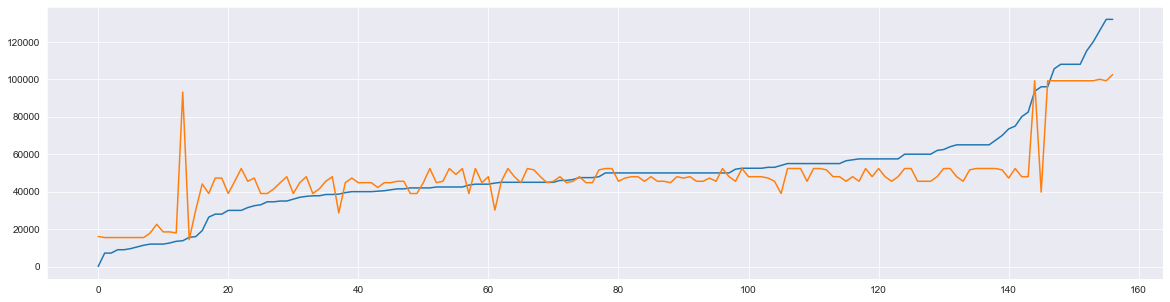

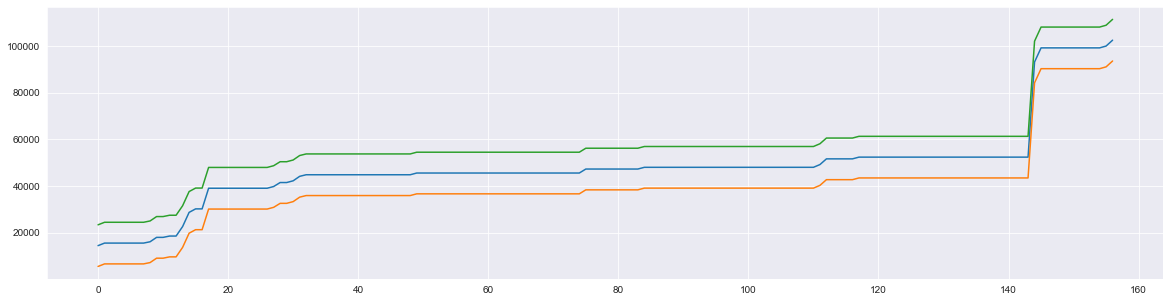

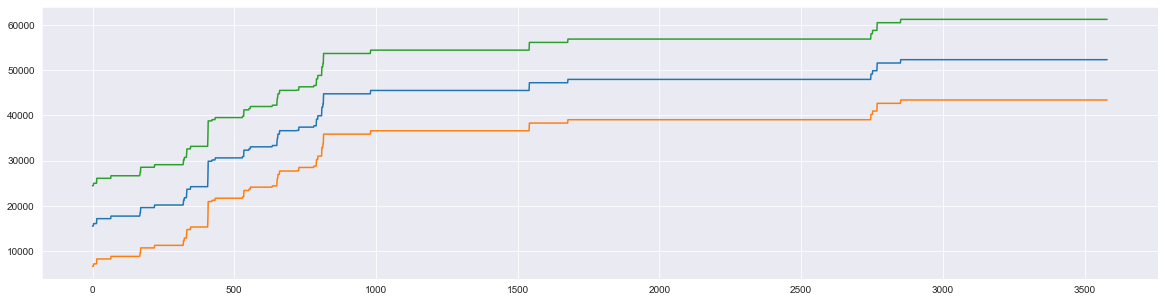

3580 + 523 = 4103
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 3337 to 522
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_min                   4103 non-null   float64
 1   salary_max                   4103 non-null   float64
 2   salary_mean                  4103 non-null   float64
 3   rating_mean                  4103 non-null   float64
 4   rating_count                 4103 non-null   int64  
 5   contract_contrat pro         4103 non-null   int64  
 6   contract_intérim             4103 non-null   int64  
 7   contract_temps plein         4103 non-null   int64  
 8   contract_indépendant         4103 non-null   int64  
 9   contract_cdd                 4103 non-null   int64  
 10  contract_temps partiel       4103 non-null   int64  
 11  contract_cdi                 4103 non-null   int64  
 12  contract_stage               4103 non-null   int64  
 13

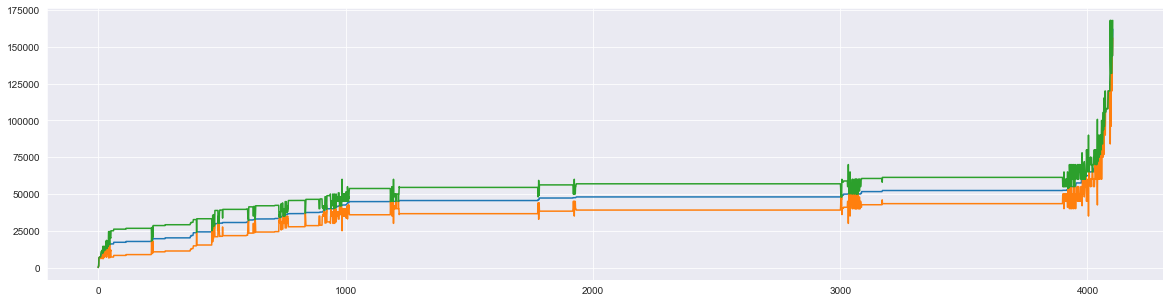

In [58]:
features = ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 
            'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage',
            'mode_an', 'query_data+scientist', 'query_business+intelligence', 'query_data+analyst', 'query_developpeur']
params = {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 600, 'booster': 'dart', 'objective': 'reg:squarederror', 'max_depth': 2, 'subsample': 1.0, 'gamma': 0}
apply_model('paris', XGBRegressor(**params), features)

# Lyon

R2 : 0.7563206800277741
MAE : 6519.299387613933
MAE/MEAN : 0.1605941485868335


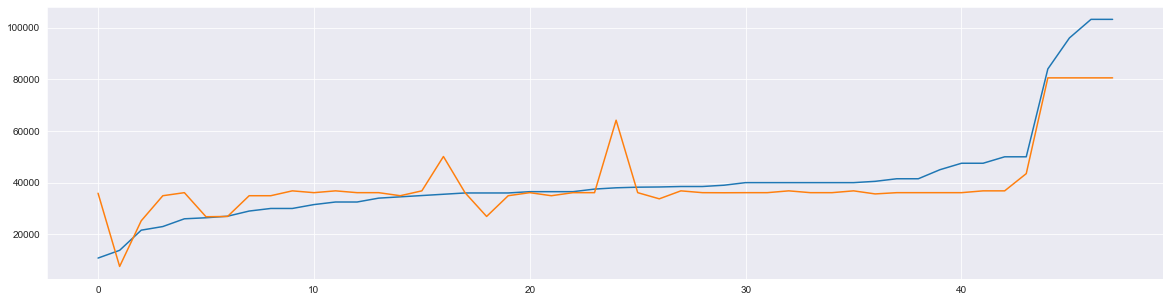

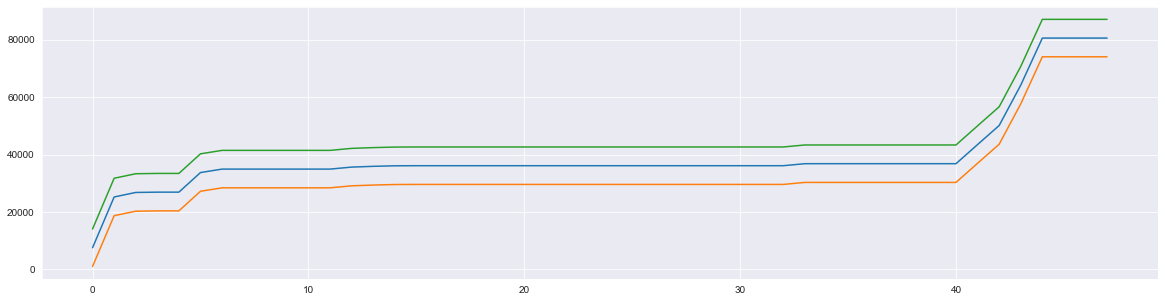

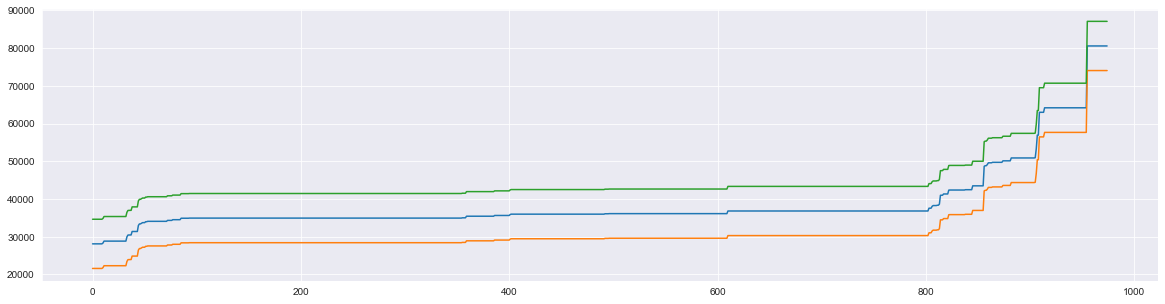

975 + 159 = 1134
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 140 to 158
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_min                   1134 non-null   float64
 1   salary_max                   1134 non-null   float64
 2   salary_mean                  1134 non-null   float64
 3   rating_mean                  1134 non-null   float64
 4   rating_count                 1134 non-null   int64  
 5   contract_contrat pro         1134 non-null   int64  
 6   contract_intérim             1134 non-null   int64  
 7   contract_temps plein         1134 non-null   int64  
 8   contract_indépendant         1134 non-null   int64  
 9   contract_cdd                 1134 non-null   int64  
 10  contract_temps partiel       1134 non-null   int64  
 11  contract_cdi                 1134 non-null   int64  
 12  contract_stage               1134 non-null   int64  
 13  

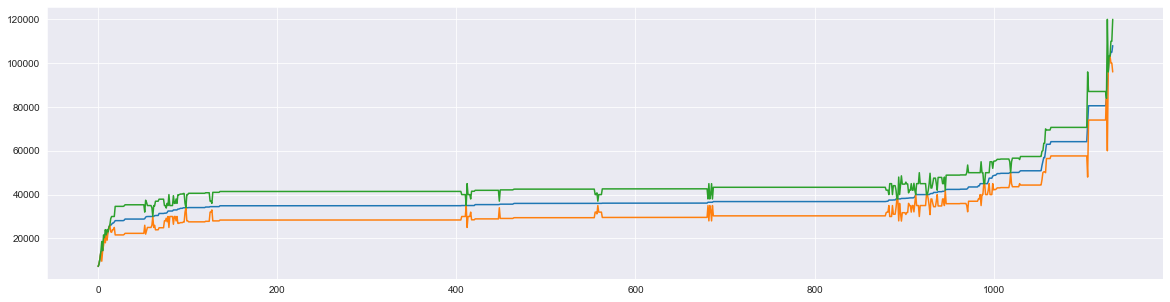

In [59]:
features = ['contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 
            'contract_temps partiel', 'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage',
            'mode_an', 'query_data+scientist', 'query_business+intelligence', 'query_data+analyst', 'query_developpeur']
params = {'random_state': 0, 'learning_rate': 0.005, 'n_estimators': 600, 'booster': 'dart', 'objective': 'reg:squarederror', 'subsample': 1.0, 'gamma': 0}
apply_model('lyon', XGBRegressor(**params), features)

# Bordeaux

R2 : 0.6142047708235692
MAE : 5872.9858240927415
MAE/MEAN : 0.1500676807977519


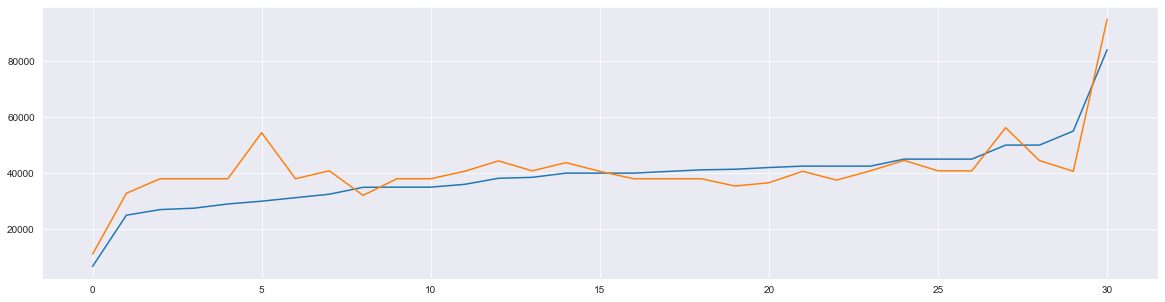

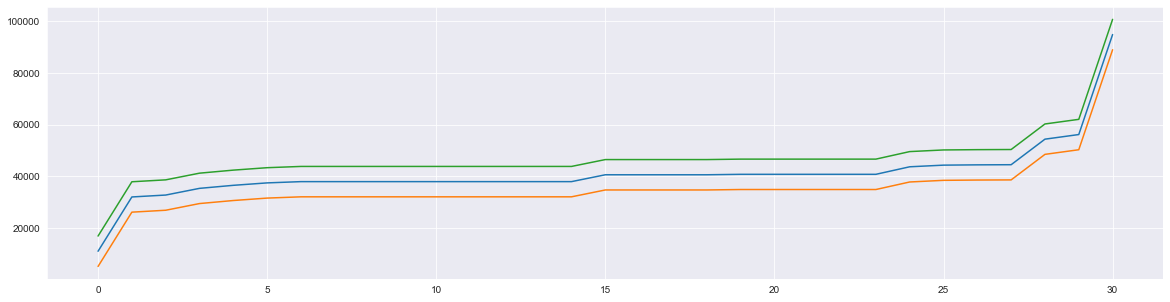

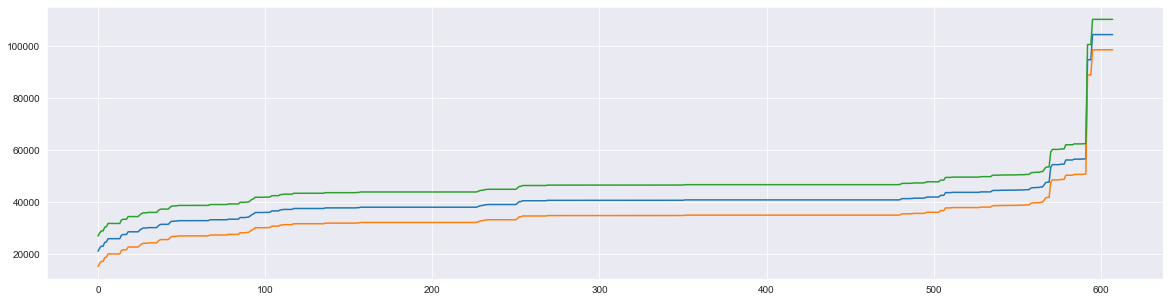

608 + 101 = 709
<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 143 to 100
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_min                   709 non-null    float64
 1   salary_max                   709 non-null    float64
 2   salary_mean                  709 non-null    float64
 3   rating_mean                  709 non-null    float64
 4   rating_count                 709 non-null    int64  
 5   contract_contrat pro         709 non-null    int64  
 6   contract_intérim             709 non-null    int64  
 7   contract_temps plein         709 non-null    int64  
 8   contract_indépendant         709 non-null    int64  
 9   contract_cdd                 709 non-null    int64  
 10  contract_temps partiel       709 non-null    int64  
 11  contract_cdi                 709 non-null    int64  
 12  contract_stage               709 non-null    int64  
 13  co

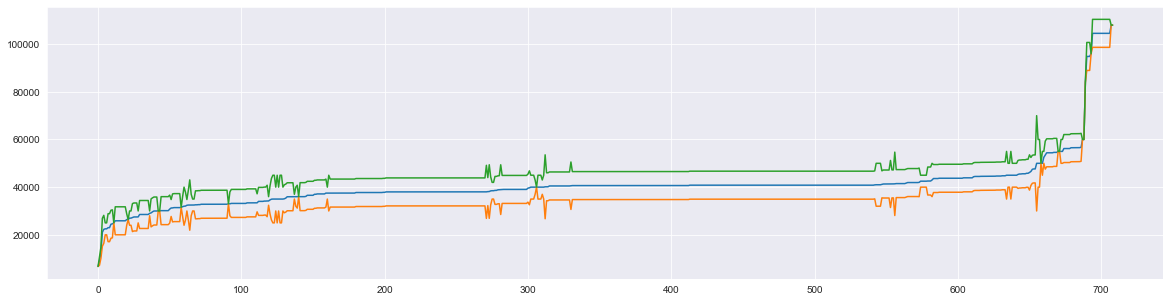

In [60]:
features = ['rating_mean', 'rating_count', 'contract_contrat pro', 'contract_intérim', 'contract_temps plein', 'contract_indépendant', 'contract_cdd', 'contract_temps partiel', 
             'contract_cdi', 'contract_stage', 'contract_commission', 'contract_apprentissage', 'mode_an', 'query_data+scientist', 'query_business+intelligence', 'query_data+analyst', 'query_developpeur']
params = {'random_state': 0, 'learning_rate': 0.1, 'n_estimators': 50, 'booster': 'dart', 'objective': 'reg:squarederror', 'max_depth': 4, 'subsample': 1.0, 'gamma': 0}
apply_model('bordeaux', XGBRegressor(**params), features)

# full

In [64]:
full = []
for city in ['paris', 'lyon', 'bordeaux']: # , 'toulouse', 'nantes'
    df = pd.read_csv('csv/%s_prediction.csv'%city)
    print(df['predicted'].value_counts())
    df['city'] = city
    full.append(df)
pd.concat(full).to_csv('csv/full_prediction.csv', index=False, encoding='utf-8')

1    3580
0     523
Name: predicted, dtype: int64
1    975
0    159
Name: predicted, dtype: int64
1    608
0    101
Name: predicted, dtype: int64
